In [ ]:
import pandas as pd

df = pd.read_csv("/content/spam.csv", encoding='latin-1')[['v1', 'v2']]


In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
print(df.head())



     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
import re #remove unwanted characters
import nltk  #nlp toolkit
from nltk.corpus import stopwords #removing words that occur frequently and removing them
from nltk.stem import PorterStemmer #converting words to base/root form

nltk.download('stopwords') #download stopwords and store them locally

ps = PorterStemmer() #reusable , object used for trimmimg words
stop_words = set(stopwords.words('english')) #loads english stopwords and convert to set , lookup time o(1)

#cleaning function
def clean_text(text):
  text = text.lower() #lowercasing
  text = re.sub(r'[^a-z]',' ',text) #Replace anything that is NOT a letter with space
  words = text.split() #tokenization
  words = [ps.stem(word) for word in words if word not in stop_words]
  return ' '.join(words)






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_text("harman@@232423pahwa")

'harman pahwa'

In [ ]:
df.columns = ['label','message']
df['label'] = df['label'].map({'ham':0, 'spam':1})
df['cleaned_message'] = df['message'].apply(clean_text)

In [ ]:
df.head()

,label,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [ ]:
df['label'].value_counts()

,count
label,
0,4825
1,747


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label']

In [ ]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 41390 stored elements and shape (5572, 3000)>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9757847533632287
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



In [ ]:
def predict_spam(text):
  text = clean_text(text)
  vec = vectorizer.transform([text])
  prediction = model.predict(vec)
  return "SPAM" if prediction[0] == 1 else "NOT SPAM"

In [ ]:
print(predict_spam("Hey Dhruv, This could be your identity in 6 months. Learn to actually build with GenAI, not just talk about it, with the Coding Ninjas Advanced Certification in GenAI & Multi-Agent Systems in collaboration with IBM."))

NOT SPAM


In [ ]:
print(predict_spam("The GitHub Copilot SDK is here (in technical preview) so you can build the AI tools, agents, and projects of your dreams.Building agentic workflows from scratch is hard. You have to manage context, orchestrate tools and commands, route between models, integrate MCP servers - the list goes on. You’ve already built a small platform before you even get to the fun stuff. GitHub Copilot SDK removes that burden. It allows you to take the same agentic core that powers GitHub Copilot CLI and embed it in any application."))

NOT SPAM


In [ ]:
print(predict_spam("free entri wkli comp win fa cup final tkt st m."))


SPAM


In [ ]:
print(predict_spam("Congratulations! You have won free iphone now"))

SPAM


In [ ]:
def predict_spam_proba(text):
  cleaned = clean_text(text)
  vec = vectorizer.transform([cleaned])
  proba = model.predict_proba(vec)[0]
  return {
      "not_spam": round(proba[0], 3),
      "spam" : round(proba[1], 3)
  }

In [ ]:
print(predict_spam_proba("Congratulations! You have won free iphone now"))

{'not_spam': np.float64(0.417), 'spam': np.float64(0.583)}


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9560538116591928
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.96      0.70      0.81       150

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.89      1115
weighted avg       0.96      0.96      0.95      1115



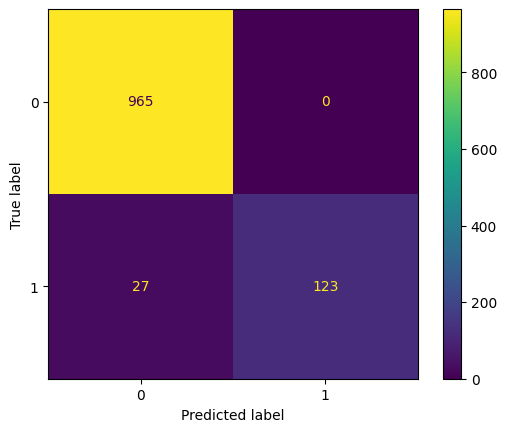

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


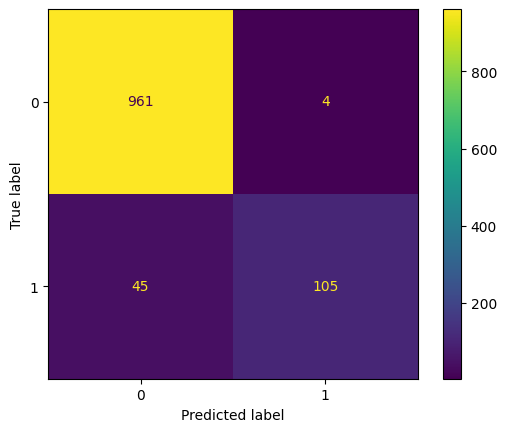

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
